# Procrastinate Pro+

# Table of contents 

I. General Information. Interim conclusions.

II. Data preprocessing. Interim conclusions.

- Column headings processing.
- Changing the data type.
- Categorical data processing.
- Numerical data processing.

III. Exploratory Data Analysis (EDA).

- Creating user profiles.
- Analysis of geolocation, devices and advertising sources of users (payer/non payer).
- Interim conclusions.

IV. Marketing
- Analysis of marketing costs (by source). Metrics visualization.
- CAC calculation (average, splitted by channel).
- Interim conclusions.

V. Ad campaign
- LTV and ROI calculation.
- Ad payback evaluation (channels and regions).

VI. Conversion and retention
- Conversion and retention (regions).
- Conversion and retention (channels).
- Conversion and retention (devices).

VII. General conclusion.

# General Information

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import os

In [2]:
# pandas and seaborn customization
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

Displaying tables with borders:

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# reading the files and saving it to the variables
try:
    visits = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/visits_info_short.csv')
    orders = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/orders_info_short.csv')
    costs = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [5]:
# custom function for primary data analysis 
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(table.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(table.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [6]:
# applying function the data
tables = [visits, orders, costs]
names = ['visits', 'orders', 'costs']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;47m_____________SET:  {name.upper()}_____________\033[0;0m\n')
    get_info(table)
    print ('\n\033[01;30;47m_____________THE END_____________\033[0;0m\n\n') 


_____________SET:  VISITS_____________

 Total number of rows:  309901 rows
 
 Total number of columns:  6 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 104.9 MB
None

 Top 5 rows: 


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



 Last 5 rows: 


,User Id,Region,Device,Channel,Session Start,Session End
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55
309900,109329042535,Germany,PC,lambdaMediaAds,2019-10-31 14:17:43,2019-10-31 15:17:04



 Missing values ratio: 
User Id         0.00
Region          0.00
Device          0.00
Channel         0.00
Session Start   0.00
Session End     0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
User Id,"309,901.00",NaN,NaN,NaN,"499,766,449,382.69","288,789,916,887.83","599,326.00","199,949,949,197.00","398,297,234,309.00","498,990,589,687.00","599,345,165,154.00","799,979,351,061.00","999,999,563,947.00"
Region,309901,4,United States,207327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device,309901,4,iPhone,112603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,309901,11,organic,107760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session Start,309901,306813,2019-06-27 14:56:41,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Session End,309901,306793,2019-07-16 02:23:30,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________THE END_____________



_____________SET:  ORDERS_____________

 Total number of rows:  40212 rows
 
 Total number of columns:  3 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5 MB
None

 Top 5 rows: 


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



 Last 5 rows: 


,User Id,Event Dt,Revenue
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99
40211,329994900775,2019-10-31 13:29:06,4.99



 Missing values ratio: 
User Id    0.00
Event Dt   0.00
Revenue    0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
User Id,"40,212.00",NaN,NaN,NaN,"499,029,531,203.23","286,093,675,967.16","599,326.00","202,770,285,245.00","398,509,487,507.00","498,283,972,665.00","593,623,981,092.00","797,761,583,545.40","999,895,427,370.00"
Event Dt,40212,40163,2019-10-26 06:49:22,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,"40,212.00",NaN,NaN,NaN,5.37,3.45,4.99,4.99,4.99,4.99,4.99,4.99,49.99



_____________THE END_____________



_____________SET:  COSTS_____________

 Total number of rows:  1800 rows
 
 Total number of columns:  3 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 251.5 KB
None

 Top 5 rows: 


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10



 Last 5 rows: 


,dt,Channel,costs
1795,2019-10-23,lambdaMediaAds,4.00
1796,2019-10-24,lambdaMediaAds,6.40
1797,2019-10-25,lambdaMediaAds,8.80
1798,2019-10-26,lambdaMediaAds,8.80
1799,2019-10-27,lambdaMediaAds,12.00



 Missing values ratio: 
dt        0.00
Channel   0.00
costs     0.00
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
dt,1800,180,2019-05-01,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,1800,10,FaceBoom,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costs,"1,800.00",NaN,NaN,NaN,58.61,107.74,0.80,5.75,9.71,12.29,16.00,53.43,630.00



_____________THE END_____________




**According to the documentation:**

*Set visits*         
* `User Id` — unique user identifier;
* `Region` — user country;
* `Device` — user device;
* `Channel` — source name;
* `Session Start` — start of session date & time;
* `Session End` — end of session date & time;

*Set orders*
* `User Id` — unique user identifier;
* `Event Dt` — order date & time;
* `Revenue` — order revenue;

*Set costs*
* `Channel` — source name;
* `Dt` — date of ad campaign;
* `Costs` — advertising costs;
    

**Brief data analysis:**  

* no missing values in the data;
* column names issues:
    1) uppercase and lowercase letters;           
    2) multiple word variables with spaces;              
    3) multiple word variables not in 'snake case' style;            
* data type issues: date & time columns in object format - datetime is needed; 
* both upper case and lower case letters in the columns with categorical data - may contain duplicates;

## Interim conclusions

We have three datasets: *visits* - server logs (309901 sessions), *orders* - orders information (40212 records), costs - advertising costs inforamtion (1800 records). 

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove duplicates, change the data type and column headings,.

# Data preprocessing

## Column headings processing

In [7]:
# column renaming
visits = visits.rename(
    columns = {
        'User Id':'user_id', 'Region':'region', 'Device':'device', 'Channel':'channel', 
        'Session Start':'session_start', 'Session End':'session_end'
    }
) 

In [8]:
orders = orders.rename(columns = {'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'})

In [9]:
costs = costs.rename(columns = {'Channel':'channel'}) 

In [10]:
# check
print(visits.columns)
print(orders.columns)
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


## Changing the data type

In this section we'll make following data type changes:

-  `session_start`, `session_end`, `event_dt`, `dt`  columns - object to datetime, pandas.to_datetime method;

In [11]:
# data type change
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [12]:
# check
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage:

## Categorical data processing

Before duplicates check transform to lowercase all columns with object type (str.lower() method). 

In [13]:
# tranformation to lowercase
obj_cols_list = ['region', 'device', 'channel']
visits = visits.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)
costs = costs.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)

In [14]:
# duplication check
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


There are no duplicates in the data.

## Numerical data processing

In this section, we will look at the distribution of orders revenue and advertising costs.

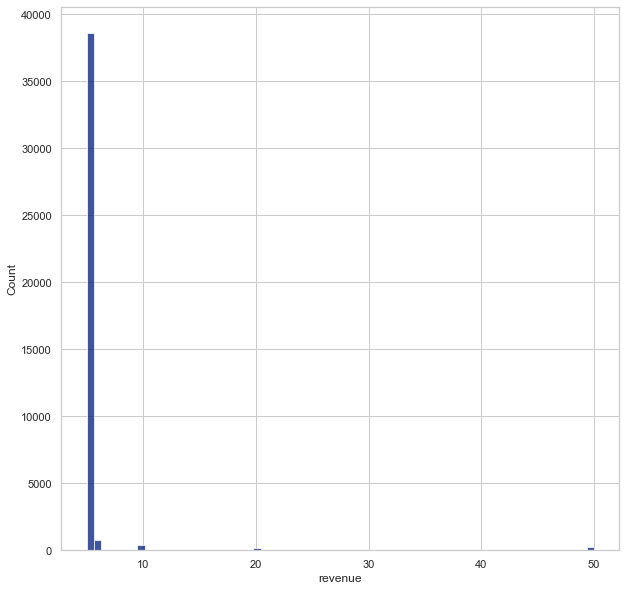

In [15]:
# revenue histogram
sns.histplot(data=orders['revenue'], bins=70);

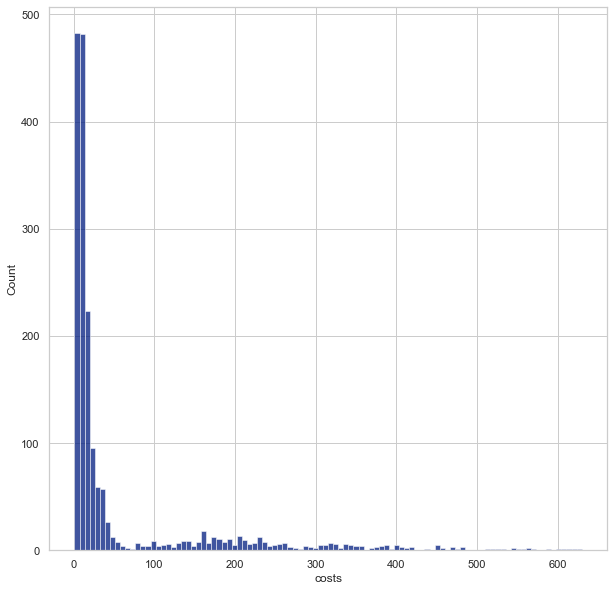

In [16]:
# advertising costs histogram
sns.histplot(data=costs['costs'], bins=100);

## Interim conclusions

In this section we've:

- edited some of the column headings according to the naming conventions in Python;
- transformed date and time data to datetime format;
- check the data for duplicates;
- processed implicit duplicates (transform to lowercase);
- analyzed numeric data: ad costs and orders revenue;

Most orders are under 10 monetary units. But there are also orders of 20 and 50 m.u.    
Revenue and advertising costs distribution is exponencial. 

# Exploratory Data Analysis (EDA)

## Creating user profiles

Dataframe *visits* contains information on user sessions (start, end), unique ID, country and device. Each user can have several sessions, but we are interested in the date of the first one. So to create profiles, we will write get_profiles() function:

In [17]:
def get_profiles(sessions):
    '''The function takes sessions logs as an input, sorts them by ID and session start date, 
    groups by ID and returns the first value of date, channel, device, and region for particular user. 
    Extracts in two separate columns (`dt` and `month`) date and month of the first session. '''
    profiles = (
        # sorting by ID and session_start
        sessions.sort_values(by=['user_id', 'session_start'])
        # grouping by ID
        .groupby('user_id')
        # first values search
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first'
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # date & month of first visit (for cohort analysis)
    profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [18]:
# applying function
profiles = get_profiles(visits)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01


## Analysis of geolocation, devices and advertising sources of users (payer/non payer).

### User profiles analysis (all users)

In this section we will find the latest and the earliest acquisition date and analyze acquisition dynamics by user region, device and channel.

In [19]:
# the latest and the earliest acquisition date
print(f'The latest acquisition date:', profiles['dt'].max().date())
print(f'The earliest acquisition date:', profiles['dt'].min().date())

The latest acquisition date: 2019-10-27
The earliest acquisition date: 2019-05-01


In [20]:
# acquisition dynamics by region, device and channel (payers and non payers)
items = ['channel', 'device', 'region']
for item in items:
    pt = profiles.pivot_table(
    index='dt',  
    columns=item,
    values='user_id',
    aggfunc='nunique'
)
    fig = px.line(pt)
    fig.update_layout(title=f'Acquisition dynamics by {item}', 
                      title_font={'size':20}, legend_font={'size':14},
                      legend_title='Acquisition channel',
                     xaxis_title='Date', yaxis_title='Unique users')
    if item == 'device':
        newnames = {'android': 'Android', 'iphone': 'IPhone', 'mac': 'Mac', 'pc': 'PC'}
        fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
        fig.update_layout(legend_title='Device')
    elif item == 'region':
        newnames = {'france': 'France', 'germany': 'Germany', 'united states': 'USA', 'uk': 'UK'}
        fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
        fig.update_layout(legend_title='Region')
    fig.show()

In [21]:
# number of unique users by region. device and channel (payers and non payers)
for item in items:
    pt = profiles.groupby(item).agg({'user_id': 'nunique'})
    fig = px.bar(pt)
    fig.update_layout(title=f'Number of unique users (channel)', 
                      title_font={'size':20}, legend_font={'size':14},
                     xaxis_title='Channel', yaxis_title='Users (count)',
                     showlegend=False)
    if item == 'device':
        fig.update_layout(title='Number of unique users (device)', title_font={'size':20},
                         xaxis_title='Device')
    elif item == 'region':
        fig.update_layout(title='Number of unique users (region)', title_font={'size':20},
                         xaxis_title='Region')
    fig.show()

### User profiles analysis (payers)

To analyze payers subset, we'll add a `payer` column to the profiles, which contains `True` for payers and `False` for non-payers. We'll take this information from the `orders` table - check for the presence of the user ID in it (`isin` method).     

Then we'll build similar charts for payers (splitted by country, devices, channels), as well as corresponding ratio-tables.

In [22]:
# add `payer` column
profiles['payer'] = profiles['user_id'].isin(np.unique(orders['user_id']))
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False


In [23]:
# payers ratio for each category
for item in items:
    table = profiles.query('payer == True').groupby(item).agg({'user_id':'nunique'})
    table['% of total'] = (100 * table['user_id'] / table['user_id'].sum().round(2))
    table = table.rename(columns={'user_id':'Users (count)', '% of total':'Ratio (%)'})
    table = table.sort_values(by = 'Ratio (%)', ascending = False)
    display(table)

,Users (count),Ratio (%)
channel,,
faceboom,3557,40.05
tiptop,1878,21.15
organic,1160,13.06
wahoonetbanner,453,5.10
adnonsense,440,4.95
rocketsuperads,352,3.96
leapbob,262,2.95
opplecreativemedia,233,2.62
lambdamediaads,225,2.53


,Users (count),Ratio (%)
device,,
iphone,3382,38.08
android,2050,23.08
mac,1912,21.53
pc,1537,17.31


,Users (count),Ratio (%)
region,,
united states,6902,77.72
uk,700,7.88
france,663,7.47
germany,616,6.94


In [24]:
# acquisition charts (by device, channel and region), payers only
items = ['channel', 'device', 'region']
for item in items:
    pt = profiles.query('payer == True').pivot_table(
    index='dt',  
    columns=item,
    values='user_id',
    aggfunc='nunique'
)
    fig = px.line(pt)
    fig.update_layout(title=f'Acquisition dynamics by channel (payers only)', 
                      title_font={'size':20}, legend_font={'size':14},
                     xaxis_title='Date', yaxis_title='Number of users (unique)')
    if item == 'device':
        newnames = {'android': 'Android', 'iphone': 'IPhone', 'mac': 'Mac', 'pc': 'PC'}
        fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
        fig.update_layout(title='Acquisition dynamics by device (payers only)', legend_title='Устройства')
    elif item == 'region':
        newnames = {'france': 'France', 'germany': 'Germany', 'united states': 'USA', 'uk': 'UK'}
        fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
        fig.update_layout(title='Acquisition dynamics by region (payers only)', legend_title='Region')
    elif item == 'channel':
        fig.update_layout(legend_title='Acquisition channel')
    fig.show()

In [25]:
# number of unique users by region. device and channel (payers only)
for item in items:
    pt = profiles.query('payer == True').groupby(item).agg({'user_id': 'nunique'})
    fig = px.bar(pt)
    fig.update_layout(title=f'Number of unique users by aquisition channel (payers only)', 
                      title_font={'size':20}, legend_font={'size':14},
                     xaxis_title='Channel', yaxis_title='Users (count unique)',
                     showlegend=False)
    if item == 'device':
        fig.update_layout(title='Number of unique users by device (payers only)', title_font={'size':20},
                         xaxis_title='Device')
    elif item == 'region':
        fig.update_layout(title='Number of unique users by region (payers only)', title_font={'size':20},
                         xaxis_title='Region')
    fig.show()

## Interim conclusions

The data provided from May 1st to October 27th, 2019.

*All users:*
- the main acquisition channel is oragnic (i.e., without spending money on paid ads), the peak is observed in early May (more than 400 users daily), the rest of the time - between 200 and 400 users daily. During the whole period of observation through this channel came more than 500K unique users. Other popular channels are faceboom and tiptop (engaged 30K and 19,5K unique users respectively). Through these channels systematically comes over 100 users daily;
- the leader among user devices is iPhone (54.5K users). Other devices are more or less at the same level of use (30-3K);
- region: the US is largely ahead (more than 100K unique users for entire period) and between 300 and 800 users daily. The remaining regions have 7 - 14K users for all time and around 100 users daily;

*Payers*:
- the main acquisition channel is faceboom - 40% of all users (3557), 10-40 users daily, slow growth from May to October is observed; Other popular channels - tiptop (10-15 payers daily and 21% of all users) and organic (around 10 users daily and 13% of all users); 
- the leader in devices, but with less detachment of the rest is iPhone (3382 users, 38% of total). Other devices are more or less at the same level of use (1.5-2K users, 17-23% of total);
- region: the US is largely ahead (6900 users, 77.72% of total) and between 20 and 60 users daily with positive trend. The remaining regions have 600-700 users for all time and rarely more than 10 users users daily with no specific pattern;

# Marketing

## Analysis of marketing costs (by source). Metrics visualization.

In [26]:
# total marketing costs
costs['costs'].sum().round(2)

105497.3

In [27]:
# split by source
pt = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs')
fig = px.bar(pt)
fig.update_layout(title=f'Ad costs by acquisition channel', 
                      title_font={'size':20},
                     xaxis_title='Channel', yaxis_title='RUB',
                     showlegend=False)
fig.show()

*Absolute leaders are faceboom and tiptop.*

In [28]:
# costs dynamics by channel
fig = px.line(costs, x='dt', y='costs', color='channel', title='Ad costs by acquisition channel in dynamics')
fig.update_layout(title_font={'size':20},
                     xaxis_title='Date', yaxis_title='RUB', legend_title='Channel')
fig.show()

*Ad costs for leading channels are trending upwards.*

## CAC calculation (average, splitted by channel).

In this secton we calculate **CAC - Customer Acquisition Cost.**

We will use our previously function `get_profiles`. Add to it an `acquisition_cost` column. The resulting function accepts an additional argument - `ad_costs` - a dataframe with advertising costs.

In [29]:
# organic users filtering
visits = visits.query('channel != "organic"')

In [30]:
# `get profiles` function with CAC calculation
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    #`payer` feature
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # the number of unique users with the same channel and aquisition date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    # merge ad costs and number of engaged users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # acquisition cost calculation
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # add CAC to user profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # CAC for organic users equals zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [31]:
# CAC calculation
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.08
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.09
2,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.99
3,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.21
4,46006712,2019-06-30 03:46:29,adnonsense,android,france,2019-06-30,2019-06-01,True,1.01


In [32]:
# CAC by cahnnel
fig = px.line(profiles.pivot_table(
    index='dt', 
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='mean'))
fig.update_layout(title=f'CAC by acquisition channel in dynamics', 
                      title_font={'size':20},
                     xaxis_title='Date', yaxis_title='RUB',
                 legend_title='Channel')
fig.show()

*We observe a steady increase for tiptop channel.*

## Interim conclusions

Over the whole period on user acquisition was spent RUB 105497.  

Most of the expenditures belong to tiptop (more than 50K RUB, i.e. more than half of all expenses) and faceboom (32K RUB) channels, followed by wahoonetbanner channel (only 5K RUB).

*Ad costs in dynamics:* ad costs for tiptop and faceboom channels are trending upwards (from 60-100 RUB daily in May to 200-350 RUB daily in October), cost reduction is observed for adnonsense channel (in July, 2019): from 40 RUB to 20 RUB daily, for other channels there are no specific patterns. 

*CAC in dynamics:* 
- acquisition cost for tiptop channel increases sharply for the entire period. Growth peaks are observed on May 20 (doubling the cost), then on June 27, August 2 and September 4, about once a month;
- nominal fluctuations for adnonsense and lambdamediaads channels;
- cost reduction for rocketsuperads channel by August 2019 (from 0.5 to 0.3 RUB per user);
- for other channels, the average acquisition cost over a given period is relatively stable.

# Ad campaign

## LTV and ROI calculation  

In this section we'll calculate two metrics:
* **LTV (Lifetime Value)** - is the total worth to a business of a customer over the whole period of their relationship.
* **ROI (Return On Investment)** - is a performance measure used to evaluate the efficiency or profitability of an investment or compare the efficiency of a number of different investments.

To calculate this metrics we'll write a function. To analyze advertising performance, we will assume today is November 1st, 2019 and in the business plan it is assumed that users should pay off no later than two weeks after the attraction.

In [33]:
# set observation_date and horizon
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [34]:
# function for calculation LTV and ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False
):
    '''The function takes user profiles, orders data, observation date and horizon as an input (as well as optional 
    parameter `dumensions` - by which metrics can be splitted). Returns raw data, LTV and ROI tables, LTV and ROI dynamics
    tables.'''

    # excluding users who don't match the horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # adding orders data to profiles 
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # lifetime calculation
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # grouping by cohort, if `dimensions` is not specified
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # grouping function
    def group_by_dimensions(df, dims, horizon_days):
        # revenue pivot table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        # cohort sizes calculation
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # merging cohort sizes and revenue tables
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # LTV calculation: divide every 'cell' by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exluding all lifetimes above the horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # return cohort sizes
        result['cohort_size'] = cohort_sizes

    # create a dataframe with users data and CAC values, add parameters from `dimensions`
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

    # average CAC calculation
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
            )

    # ROI calculation: LTV/CAC
        roi = result.div(cac['cac'], axis=0)
    # drop rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
    # return cohort sizes in ROI table
        roi['cohort_size'] = cohort_sizes
    # add CAC in ROI table
        roi['cac'] = cac['cac']
    # in the final table keep cohort sizes, CAC and ROI with lifetime below horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    # LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # drop 'cohort' from dimensions for dynamics tables
    if 'cohort' in dimensions:
        dimensions = []

    # LTV and ROI dynamics tables
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (
        result_raw, # raw data
        result_grouped, # LTV table
        result_in_time, # LTV dynamics table
        roi_grouped, # ROI table
        roi_in_time, # ROI dynamics table
    )

For more convenient graphic analysis and noise reduction we will write a smoothing function.

In [35]:
def filter_data(df, window):
    '''The function takes a dataframe a smoothing value (window) as an input, calculates moving average for each column
    and returns the processed dataframe.'''
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

We will also write a visualization function.

In [36]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    '''The function takes LTV, ROI tables, horizon and smoothing value as an input and on one layout draws 5 graphs: 
    1) LTV;
    2) LTV in dynamics on the specified day;
    3) CAC;
    4) ROI;
    5) ROI in dynamics on the specified day.'''
    
    # set the graph grid
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes from LTV table
    ltv = ltv.drop(columns=['cohort_size'])
    # keep only specified lifetime value in LTV dynamics table 
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # record CAC in a separate variable
    cac_history = roi_history[['cac']]

    # exclude cohort sizes and CAC from ROI table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # keep only specified lifetime value in ROI dynamics table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first chart — ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second chart — LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all indexes will become a pivot table columns (except the date)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date')
    plt.title('LTV dynamics on the {}th day'.format(horizon))

    # third chart - CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all indexes will become a pivot table columns (except the date)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date')
    plt.title('CAC dynamics')

    # fourth chart — ROI
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Profitability level')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth chart — ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all indexes will become a pivot table columns (except the date)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Profitability level')
    plt.xlabel('Date')
    plt.title('ROI dynamics on the {}th day'.format(horizon))

    plt.tight_layout()
    plt.show()

In [37]:
# applying function to the data
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False)

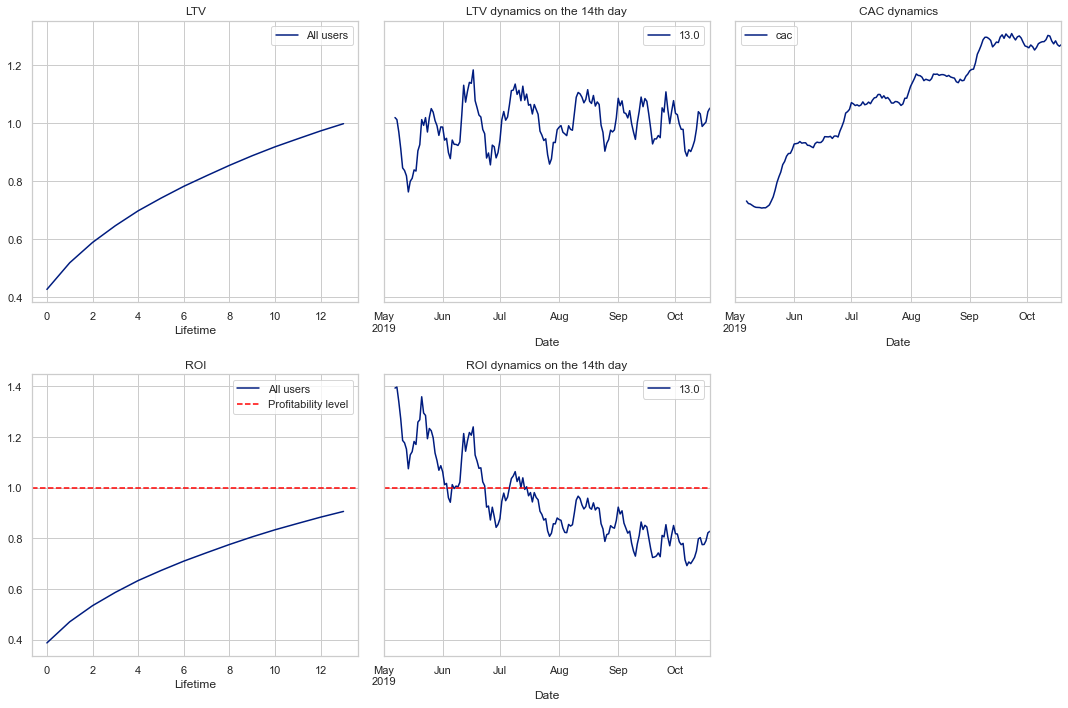

In [38]:
# visualization
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Conclusions:**

- LTV for the 14th day was 1.0;
- advertising makes no money. The ROI value two weeks after engaging users is around 90%;
- CAC is growing, meaning that advertising becomes more difficult to recoup;
- there are seasonal fluctuations of the LTV, but it is relatively stable. So it's not about deteriorating user quality;
- in June, the cost of attracting users rose sharply, with the CAC almost equals to the LTV, meaning that the company stopped making profits. And by September, the CAC was even above the maximum LTV values;
-  ROI on the 14th day decreases throughout the period, by July it has fallen below payback level.

To understand the reasons, let's review all available user features - country, source and device.

## Ad payback evaluation (channels and regions).

Let's split the data by regions: pass `region` column to `dimensions`.

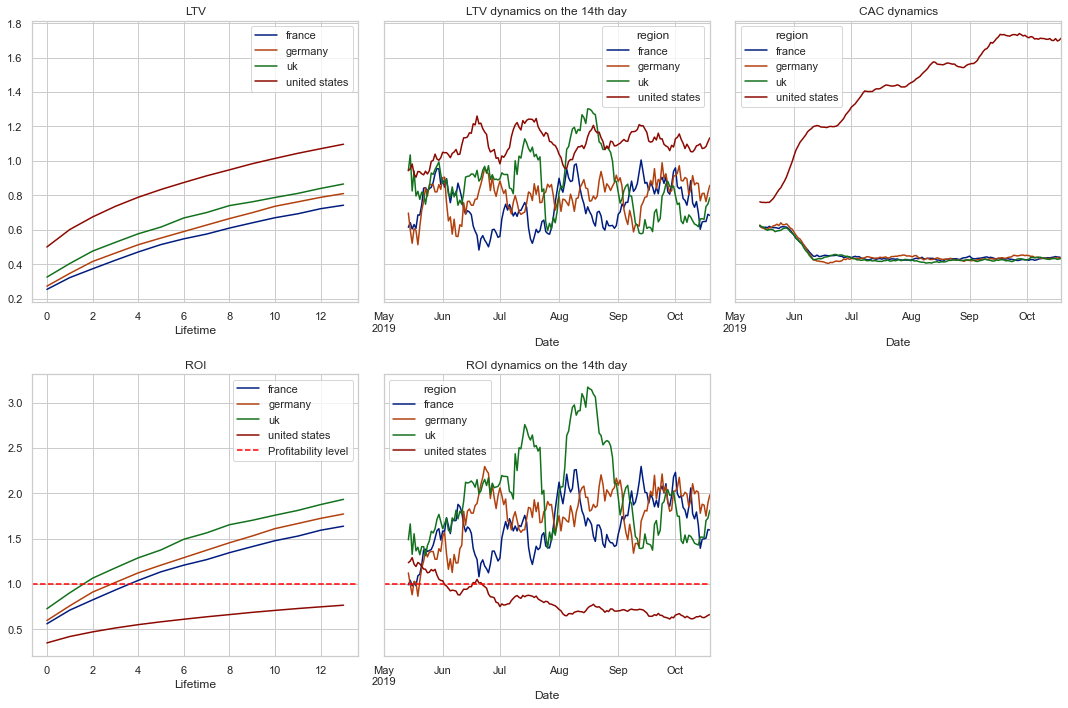

In [39]:
# get data and draw charts (by region)
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Conclusions:**

- the highest LTV in the US;
- on the 4th day advertising pays off in all countries except the US;
- the cost of attracting users from France, the United Kingdom and Germany fell in June and remained stable;
- advertising costs increase by increasing the cost of attracting users from USA;
- LTV remains seasonal, but stable for all countries;
- unlike other countries, the US has negative ROI dynamics on the 14th day, in mid-June below the payback level.   

Now let’s check the acquisition channels.

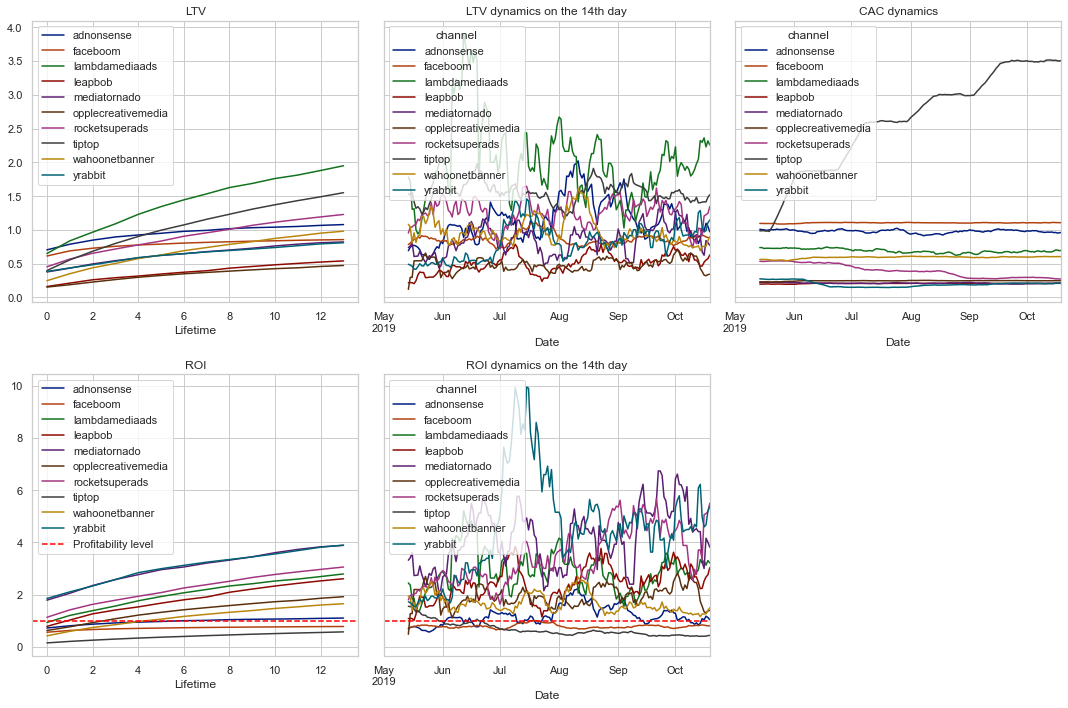

In [40]:
# get data and draw charts (by acquisition channels)
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Conclusions:**

- LTV value leaders across channels are lambdamediaads and tiptop, outsiders - opplecreativemedia and leapbob;
- LTV on the 14th day varies for all channels;
- acquisition cost increases only for the tiptop channel, for the rest - the cost is relatively stable;
- ad campaign pays off for all channels except faceboom and tiptop, also adnonsense channel is at the limit of the payback level;
- ROI dynamics on the 14th day varies for all channels, the peak in July observed for the yrabbit channel ;

Now let’s move on to the devices.

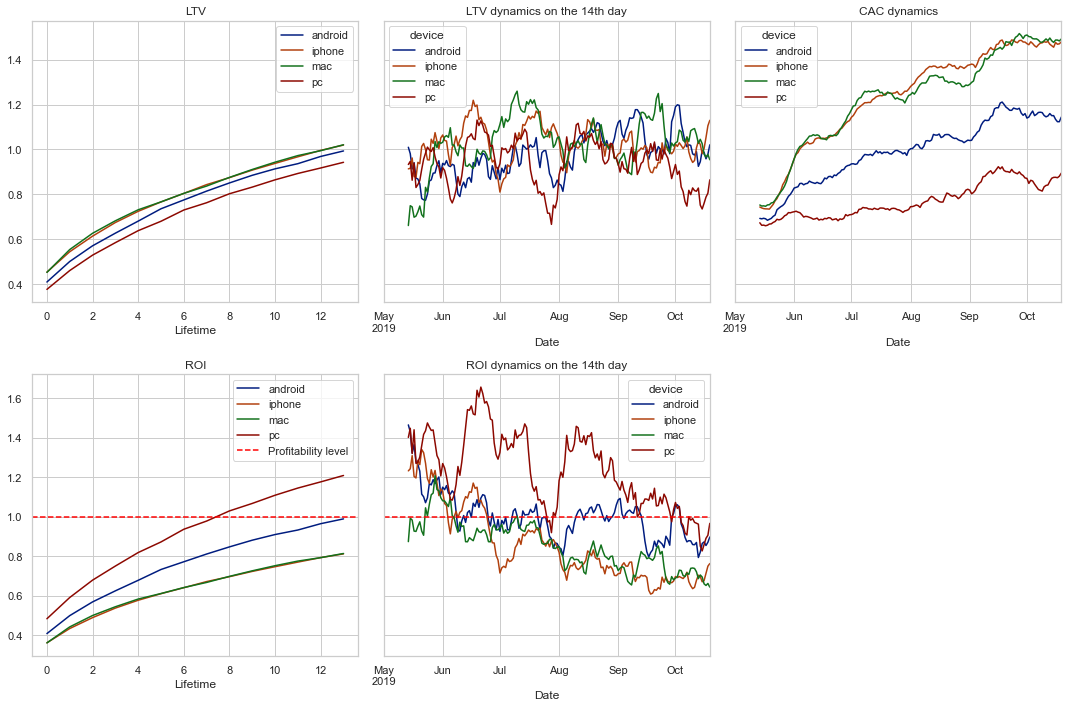

In [41]:
# get data and draw charts (by device)
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Conclusions**:

- there is no clear LTV-leader, slightly lower is the PC curve;
- LTV on the 14th day varies for all devices;
- the acquisition cost is increasing for all devices, especially for iPhone and Mac users;
- advertising pays off only for PC users;
- ROI on the 14th day goes down for all categories;

# Conversion and Retention

In order to find out why ad does not pay off, let's build conversion and retention graphs. To calculate these metrics, let's create two functions: `get_conversion` and `get_retention`.

To visualize conversion and retention dynamics, let's create `plot_conversion` and `plot_retention` functions.

In [42]:
# retention calculation
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    '''The function takes user profiles, sessions data, observation date and horizon as an input (as well as optional 
    parameter `dumensions` - by which metrics can be splitted). Returns raw data and two tables: retention and retention 
    dynamics.'''

    # add payer in dimensions
    dimensions = ['payer'] + dimensions

    # exclude users who don't match the horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # get raw data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # grouping function
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return raw data and two tables
    return result_raw, result_grouped, result_in_time

In [43]:
# conversion calculation
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''The function takes user profiles, purchases data, observation date and horizon as an input (as well as optional 
    parameter `dumensions` - by which metrics can be splitted). Returns raw data and two tables: conversion and conversion 
    dynamics.'''
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # find date and time of first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to user profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort if there are no dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # grouping function
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each cell by cohort size, get conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # drop cohort from `dimensions` for conversion dynamics table
    if 'cohort' in dimensions: 
        dimensions = []

    # conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return two tables and raw data
    return result_raw, result_grouped, result_in_time

In [44]:
# retention visualization
def plot_retention(retention, retention_history, horizon, window=7):
    
    '''The function takes retention, retention dynamics tables and horizon as an input. In function's body we'll use
    `filter_data` funtion to smooth the graphs. Smoothing value equals 7 by default. The function returns 4 graphs on one
    layout: retention graphs (payers\non-payers) and retention in dynamics (payers\non-payers).'''
    
    # set the graph grid
    plt.figure(figsize=(15, 10))

    # drop cohort sizes and retention of the first fay
    retention = retention.drop(columns=['cohort_size', 0])
    # in retention dynamics table keep only proper lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if in table indexes is `payer` only add second feature - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # there are 2 columns and two rows in the graph grid
    # first chart - retention (payers)
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Payers retention')

    # second chart - retention (non-payers)
    # the same y-axis
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Non-payers retention')

    # third chart - retention dynamics (payers)
    ax3 = plt.subplot(2, 2, 3)
    # get the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and draw graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date')
    plt.title(
        'Retention dynamics on {}th day (payers)'.format(
            horizon
        )
    )

    # fourth chart - retention dynamics (non-payers)
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and draw graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date')
    plt.title(
        'Retention dynamics on {}th day (non-payers)'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [45]:
# conversion visualization
def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    '''The function takes conversion, conversion dynamics tables and horizon as an input. In function's body we'll use
    `filter_data` funtion to smooth the graphs. Smoothing value equals 7 by default. The function returns 2 graphs on one
    layout: conversion graph and conversion in dynamics.'''

    # set the grid size
    plt.figure(figsize=(15, 5))

    # drop cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in conversion dynamics table keep only proper lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # first graph - conversion
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion')

    # first graph - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all indexes will become a pivot table columns (except the date)
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date')
    plt.title('Retention dynamics on {}th day'.format(horizon))

    plt.tight_layout()
    plt.show()

## Conversion and retention by region

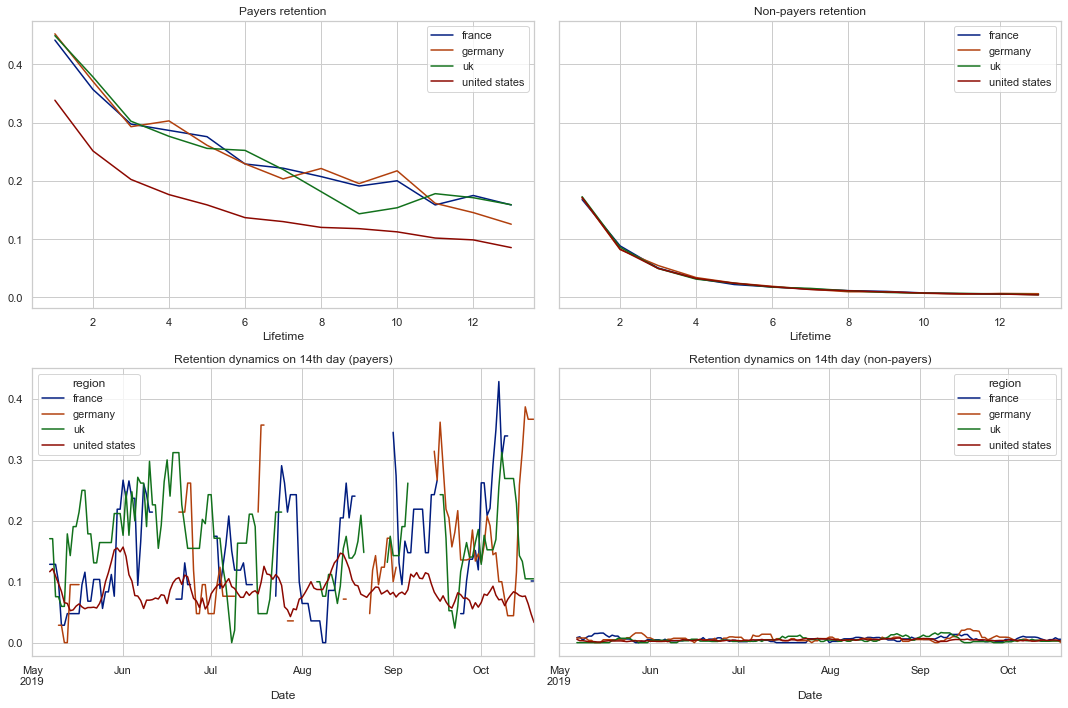

In [46]:
# retention by region
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

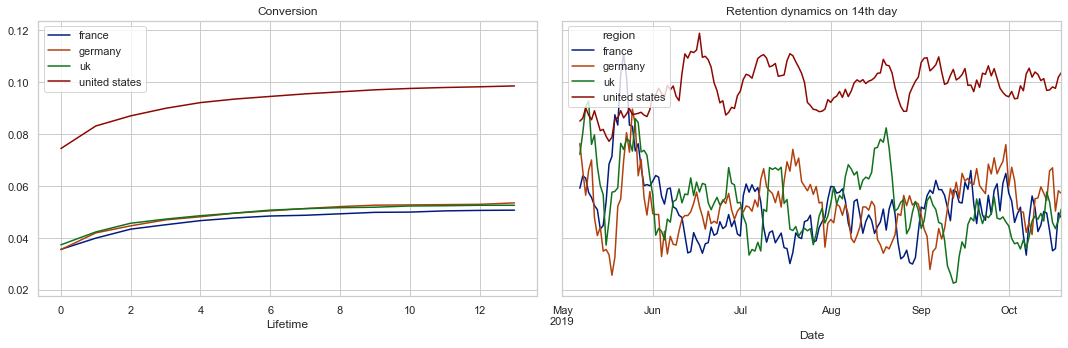

In [47]:
# conversion by region
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusions:**

- of users from the USA have the highest conversion rate but the lowest retention rate;
- conversion of users from Germany, France and Great Britain is about the same level;
- the retention rate of payers is greater than the retention rate of non-payers;
- non-payers retention is low for all regions, retention curve at the end of the second week and the 14th day retention is near zero;

## Conversion and retention by acquisition channel

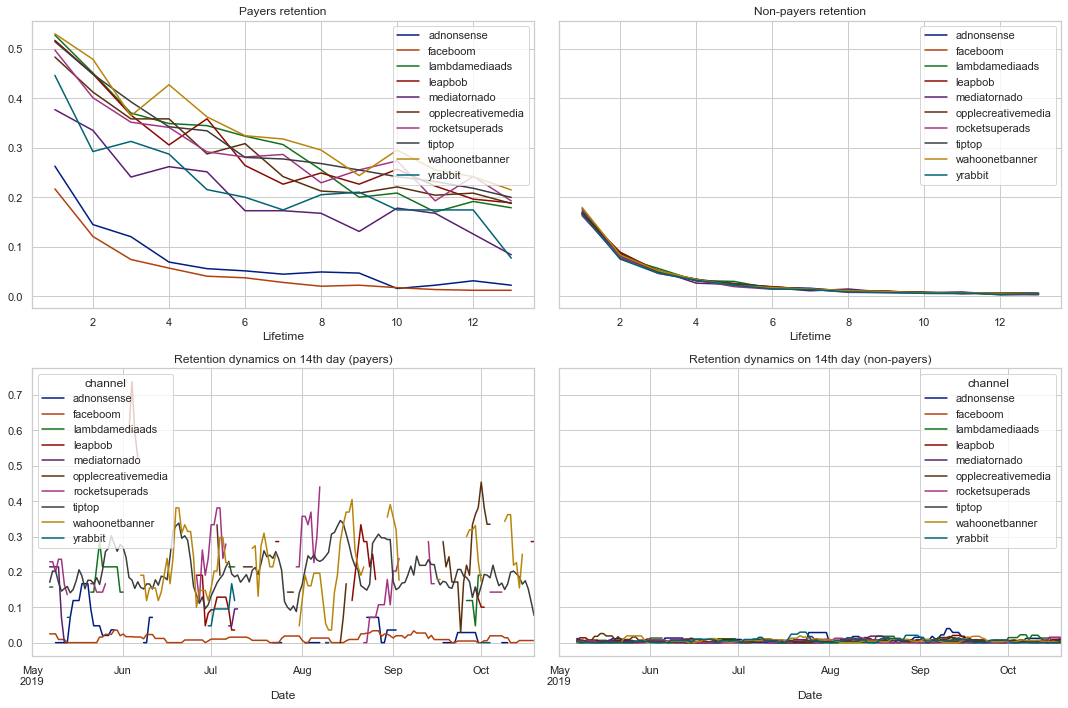

In [48]:
# удержание с разбивкой по каналам привлечения
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

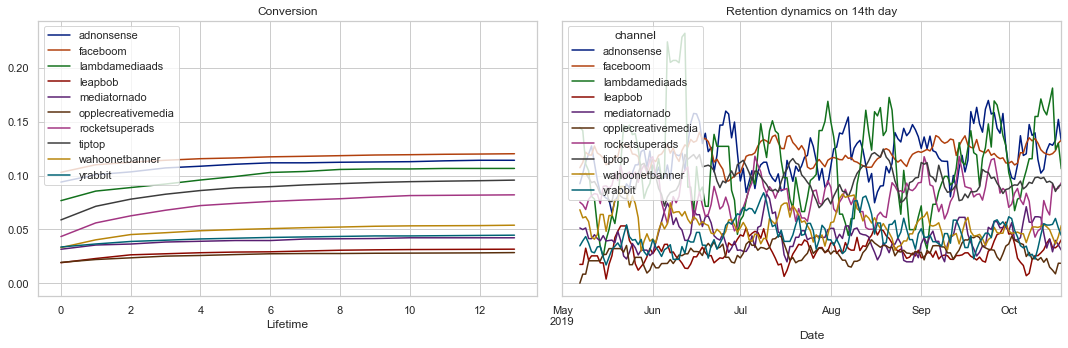

In [49]:
# конверсия с разбивкой по по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusions:**

- users from faceboom and adnonsense channels have the best conversion rate, the worst - opplecreativemedia and leapbob channels;
- payers' retention is the lowest for faceboom and adnonsense channels; 
- the highest retention rate have lambdamediaads and wahoonetbanner channels;
- the retention rate of payers is greater than the retention rate of non-payers;
- non-payers retention is low for all channels, retention curve at the end of the second week and the 14th day retention is near zero;

## Conversion and retention by device

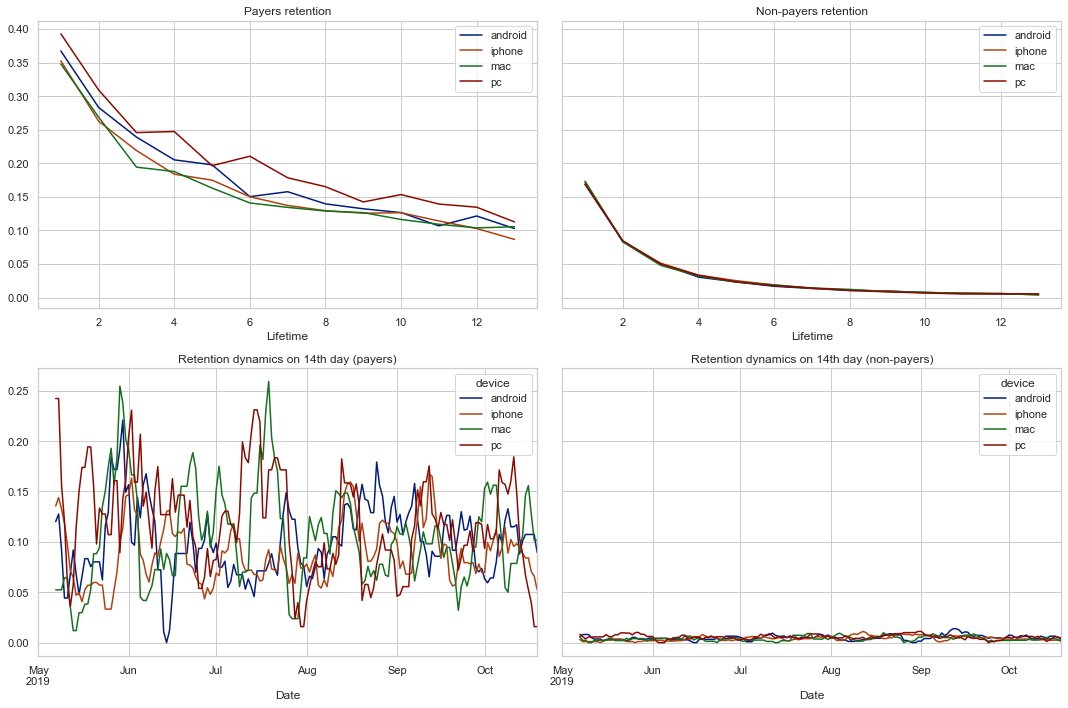

In [50]:
# удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

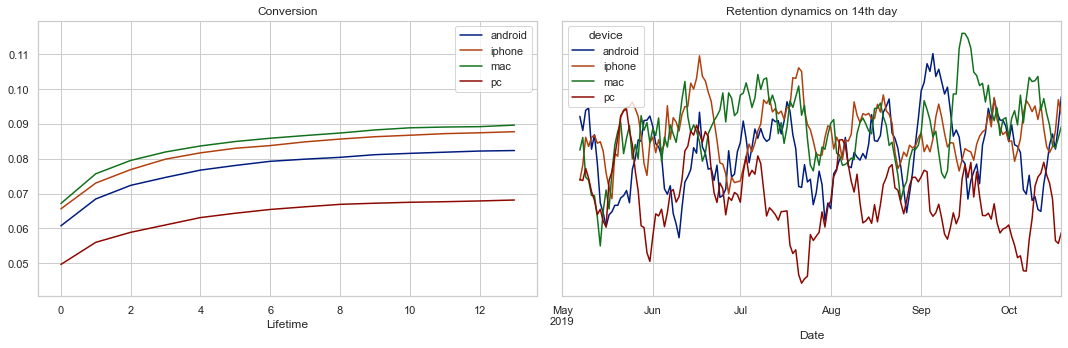

In [51]:
# конверсия с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusions:**

- the best conversion rate have iPhone and Mac users, the worst - PC users;
- payers retention is the lowest for iPhone and Mac users;
- the retention rate of payers is greater than the retention rate of non-payers;
- non-payers retention is low for all regions, retention curve at the end of the second week and the 14th day retention is near zero;

# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project, we worked as marketing analysts for Procrastinate Pro+ entertainment application, which has recently suffered losses, despite huge investments in advertising. The data that we had in hand were marketing expenses, server logs from May 1 to October 27, 2019, and orders for this period. 

**The main points in data preprocessing:**
* editing some column headings according to the naming conventions in Python;
* date and time data in datetime format transformation;
* full duplicates check;
* implicit duplicates processing;
* numerical data analysis: ad costs and revenue values;

**Some aspects:**
* there were no missing values in the data;
* column names issues were detected: 
    1) uppercase and lowercase letters;
    2) multiple word variables with spaces;
    3) multiple word variables not in 'snake case' style;
* columns with date\time information had `object` format (transformed into `datetime` format);
* categorical data (region, channel, device) were transformed into lowercase to eliminate possible duplicates;

**General analysis of acquisition channels, regions and devices:**
* the largest number of users come to the application through organic channel  - more than 500K for the entire period;
* other popular channels are  faceboom and tiptop (30K and 19.5K respectively) - also through these channels came more than 60% of all payers;
* attraction through other channels - less than 100 users daily;
* the device leader is iPhone (54.5K users), the leader among the regions is the USA (more than 100K users), for payers and non-payers;

**Ad costs analysis:**
* over the whole period on user acquisition was spent RUB 105497.
* most of the expenditures belong to tiptop (more than 50K RUB, i.e. more than half of all expenses) and faceboom (32K RUB) channels;
* ad costs in dynamics are trending upwards for faceboom and tiptop channels, reduction is observed for adnonsense channel;
* acquisition cost for tiptop channel increased sharply for the entire period, fluctuated for adnonsense and lambdamediaads channels and decreased for rocketsuperads channel;

**Ad payback analysis:**
* observation date - 1 November 2019, horizon - 14 days;
* LTV on the 14th day was 1.0, CAC in June is almost equals o the LTV, and by September, was even above the maximum LTV values, ROI value on the 14th day is around 90% - i.e. advertising does not pay off;
* despite the highest LTV for USA users (and the highest number of users from this country), this is the only region where advertising does not pay off;
* for US users, advertising costs are rising due to acquisition costs (for the rest of the countries, acquisition costs are relatively stable);
* the highest  LTV have lambdamediaads and tiptop channles, outsiders - opplecreativemedia and leapbob;
* acquisition cost increase only for the tiptop channel, but the advertising costs are not profitable;
* by LTV there is no obvious leader among devices, and acquisition costs are increasing for all groups, particularly for iPhone and Mac users;
* advertising pays off only for PC users;
* ROI dynamics on the 14th day decreases for all devices, as well as for users from the USA;
    
    
**Retention and conversion analysis:**
* payers retain more than non-payers in all categories;
* non-payers retention is equally low for all channels, at the end of the second week it is close to zero along with retention dynamics on 14th day;
* users from USA have the highest conversion rate but the lowest retention rate;
* users from faceboom and adsnonsense channels have the highest conversion rate but their retention is the lowest;
* amongst the devices, the best conversions have iPhone and Mac users, the worst of all - PC, IPhone and Mac users have the lowest retention rate;
    
    
**Recommendations:**
    
One of the priority objectives is to increase the retention of American users who, despite a good conversion, quickly quit the application. The United States region has the highest level of user attraction. To increase retention, we can manage an e-mailing system with different sending frequencies according to the duration of use of the application. Or we can start a loyalty program offering rewards to regular clients. The same strategy should be used for IPhone and Mac users with a good conversion rate and low retention rate.       
With regard to acquisition channels, there is a need to change the "race for traffic" strategy to work with the target audience. Tiptop and faceboom channels are unprofitable (we recommend to reduce costs on them). Most users come through these channels, but the acquisition cost does not pay off. It may also be helpful to support yrabbit (with peak ROI) and lambdamediaads (high LTV) channels.     
Eutopean users, which are profitable, retain well, but have a low conversion rate. We can try to raise their conversion rate through stocks, discounts or promotional codes.